In [1]:
import numpy as np
import matplotlib.pyplot as plt

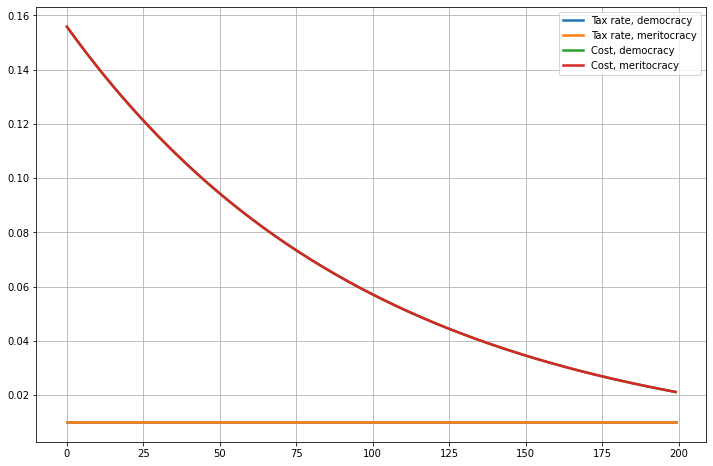

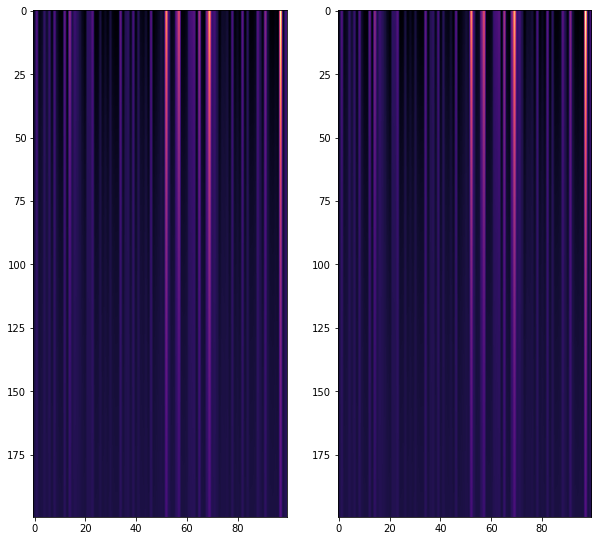

In [6]:
# Experiment 1
# Replaying this map, for fixed tax_rates, converges to uniform incomes
def voting_iteration(incomes, tax_rate=0.1, use_weights=None):
    contributions = incomes * tax_rate
    n = len(incomes)
    total_contribution = contributions.sum()
    transfer_per_person = total_contribution/n
    new_incomes = incomes - contributions + transfer_per_person # I' = (1 - tau)*I + (tau*I).sum()/n
    return new_incomes


def save_results(w0, n_iterations=50, use_weights=False):
    n = len(w0)
    results = np.zeros(shape=(n_iterations, n), dtype=float)    
    w = w0
    for i in range(n_iterations):
        w = voting_iteration(w, tax_rate=0.1, use_weights=None)
        results[i] = w
    return results


# Experiment 2
# Dynamic is to distribute contributions uniformly
# Proposal is to increase tax rate by 1%
def voting_iteration2(incomes, tax_rate=0.1, use_weights=False):
    contributions = incomes * tax_rate
    n = len(incomes)
    transfer_per_person = contributions.sum() / n
    votes = transfer_per_person > contributions
    
    if use_weights == False:
        vote = votes.mean() > 0.5
    else:
        weights = contributions / contributions.sum()
        vote = ((votes * weights).sum() / weights.sum()) > 0.5
    
    new_incomes = incomes - contributions + transfer_per_person # I' = (1 - tau)*I + (tau*I).sum()/n
    cost = ((vote != votes) * np.abs(contributions - transfer_per_person)).sum()
    return new_incomes, vote, cost

def save_results2(w0, n_iterations=50, use_weights=False):
    n = len(w0)
    results = np.zeros(shape=(n_iterations, n), dtype=float)
    tax_rates = np.zeros(shape=(n_iterations), dtype=float)
    costs = np.zeros(shape=(n_iterations), dtype=float)

    w = w0
    current_tax_rate = 0.01
    for i in range(n_iterations):
        w, vote, cost = voting_iteration2(w, tax_rate=current_tax_rate, use_weights=use_weights)
        
        # if vote == True:
        #     current_tax_rate += 0.01
        results[i] = w
        tax_rates[i] = current_tax_rate
        costs[i] = cost
        # print("Iteration", i, "Vote", vote)
        # print(w, vote)
    return results, tax_rates, costs

w_init = np.random.pareto(5, (100))
r, tax_rate, costs = save_results2(w_init, 200, False)
r2, tax_rate2, costs2 = save_results2(w_init, 200, True)

plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(tax_rate, linewidth=2.5, label='Tax rate, democracy')
plt.plot(tax_rate2, linewidth=2.5, label='Tax rate, meritocracy')

plt.plot(costs, linewidth=2.5, label='Cost, democracy')
plt.plot(costs2, linewidth=2.5, label='Cost, meritocracy')

plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 20), facecolor='white')
plt.subplot(1, 2, 1)
plt.imshow(r, cmap='magma')
plt.subplot(1, 2, 2)
plt.imshow(r2, cmap='magma')
# plt.colorbar()

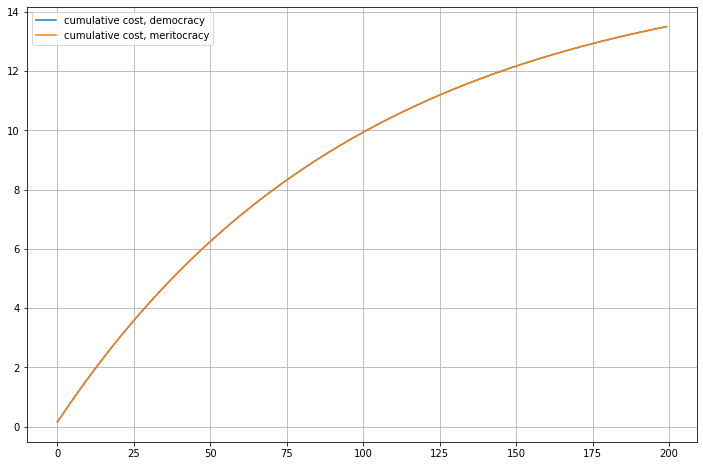

In [7]:
# Compare cumulative costs under democracy and meritocracy
plt.figure(figsize=(12, 8), facecolor='white')
plt.plot(np.cumsum(costs), label='cumulative cost, democracy')
plt.plot(np.cumsum(costs2), label='cumulative cost, meritocracy')
plt.grid(True)
plt.legend()

Iteration 0 Vote True 0.02
Iteration 1 Vote True 0.03
Iteration 2 Vote True 0.04
Iteration 3 Vote True 0.05
Iteration 4 Vote True 0.060000000000000005
Iteration 5 Vote True 0.07
Iteration 6 Vote True 0.08
Iteration 7 Vote True 0.09
Iteration 8 Vote True 0.09999999999999999
Iteration 9 Vote True 0.10999999999999999
Iteration 10 Vote True 0.11999999999999998
Iteration 11 Vote True 0.12999999999999998
Iteration 12 Vote True 0.13999999999999999
Iteration 13 Vote True 0.15
Iteration 14 Vote True 0.16
Iteration 15 Vote True 0.17
Iteration 16 Vote True 0.18000000000000002
Iteration 17 Vote True 0.19000000000000003
Iteration 18 Vote True 0.20000000000000004
Iteration 19 Vote True 0.21000000000000005
Iteration 20 Vote True 0.22000000000000006
Iteration 21 Vote True 0.23000000000000007
Iteration 22 Vote True 0.24000000000000007
Iteration 23 Vote True 0.25000000000000006
Iteration 24 Vote True 0.26000000000000006
Iteration 25 Vote True 0.2700000000000001
Iteration 26 Vote True 0.2800000000000001


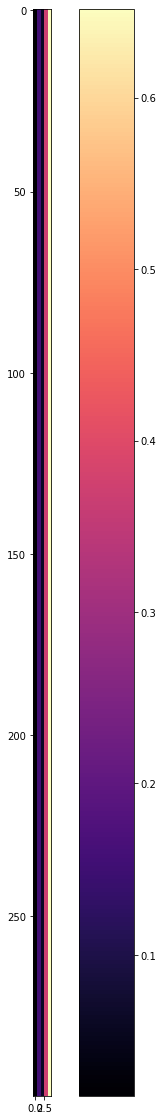

In [33]:
w = np.random.pareto(5, (5))

# Experiment 3
# Same as experiment 2 but the contributions are not removed from the wealth next year
def voting_iteration3(incomes, tax_rate=0.1, use_weights=False):
    contributions = incomes * tax_rate
    contributions2 = incomes * (tax_rate + 0.01)

    n = len(incomes)
    transfer_per_person = contributions.sum()/n
    transfer_per_person2 = contributions2.sum()/n

    votes = (transfer_per_person - contributions) < (transfer_per_person2 - contributions2)
    
    if use_weights == False:
        vote = votes.mean() > 0.5
    else:
        weights = contributions / contributions.sum()
        vote = ((votes * weights).sum() / weights.sum()) > 0.5
    
    new_incomes = incomes - contributions + transfer_per_person # I' = (1 - tau)*I + (tau*I).sum()/n
    return new_incomes, vote

def save_results3(w0, n_iterations=50, use_weights=False):
    n = len(w0)
    results = np.zeros(shape=(n_iterations, n), dtype=float)    
    w = w0
    current_tax_rate = 0.01
    for i in range(n_iterations):
        _, vote = voting_iteration3(w, tax_rate=current_tax_rate, use_weights=False)
        if vote == True:
            current_tax_rate += 0.01
        results[i] = w
        print("Iteration", i, "Vote", vote, current_tax_rate)
        # print(w, vote)
    return results, current_tax_rate

r, tax_rate = save_results3(w, 300, True)

print("tax rate:", tax_rate)

plt.figure(figsize=(10, 20), facecolor='white')
plt.imshow(r, cmap='magma')
plt.colorbar()